In [ ]:
#Q2.
""" Medical Cost Personal Insurance Project 
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?
      """

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #not required as its copied

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# Display the first few rows of the dataset
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
df.tail(10) #The tail() method returns a specified number of rows, string from the last.

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
df.shape # to check the dimension of the data set (rows, columns)

(1338, 7)

In [5]:
df.dtypes #Checking the types of columns

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#checking the null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [10]:
#checking number of unique value in each column
df.nunique().to_frame('no. of unique values')

,no. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
#droping 'region' column as it doesnot related to 'charges' column
df.drop('region', axis=1, inplace= True)

In [12]:
print(df)

      age     sex     bmi  children smoker      charges
0      19  female  27.900         0    yes  16884.92400
1      18    male  33.770         1     no   1725.55230
2      28    male  33.000         3     no   4449.46200
3      33    male  22.705         0     no  21984.47061
4      32    male  28.880         0     no   3866.85520
...   ...     ...     ...       ...    ...          ...
1333   50    male  30.970         3     no  10600.54830
1334   18  female  31.920         0     no   2205.98080
1335   18  female  36.850         0     no   1629.83350
1336   21  female  25.800         0     no   2007.94500
1337   61  female  29.070         0    yes  29141.36030

[1338 rows x 6 columns]


In [13]:
#label encoding, In this each unique category is mapped to an integer.
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [14]:
df.dtypes #Checking the types of columns again after

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
charges     float64
dtype: object

In [ ]:
# DATA VISUALISATION

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


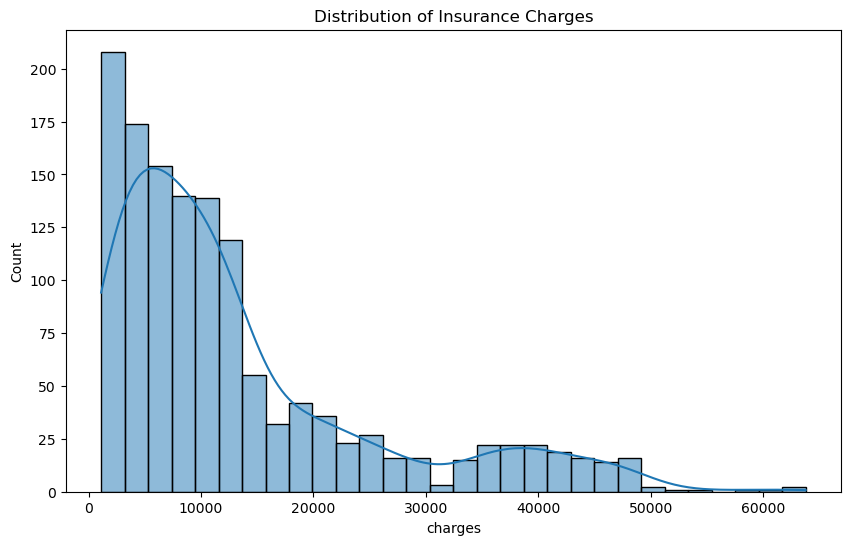

In [15]:
# Visualisation of distribution of the target variable (charges)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
print(df['charges'].value_counts())
plt.show()

In [16]:
#seperating numerical columns 
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns', numerical_col)
    

Numerical Columns ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']


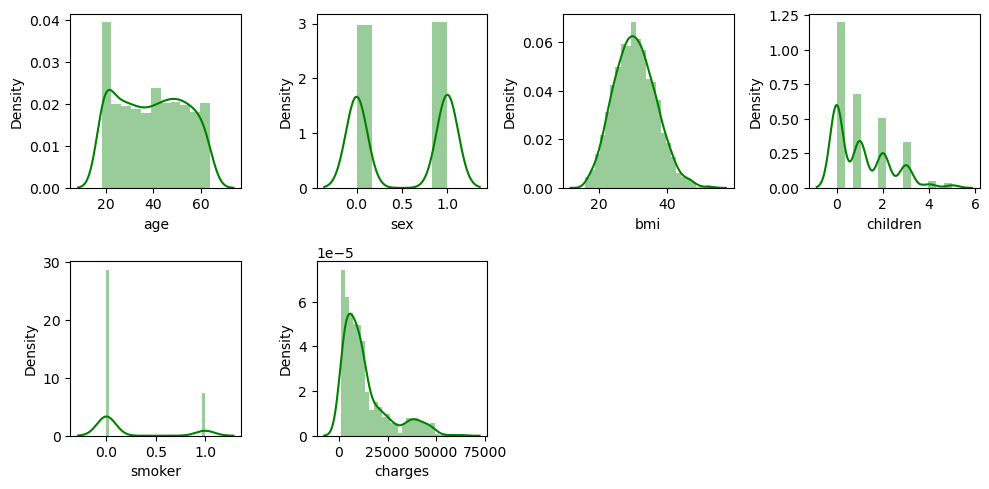

In [17]:
#lets check how the data has been distributed in remaining column 
plt.figure(figsize = (10, 7), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col], color='g')        
        plt.yticks(rotation=0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()

In [18]:
# Checking for skewness
df.skew()

#Acceptable range of skewness is from -0.5 to +0.5

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
charges     1.515880
dtype: float64

In [19]:
#Removing Skewness using cuberoot method
df['children'] = np.cbrt(df['children'])
df['smoker'] = np.cbrt(df['smoker'])
df['charges'] = np.cbrt(df['charges'])

In [20]:
# Checking Again for skewness
df.skew()


# NOTE: 'smoker' is a binary variable (0 or 1), we don't need to apply transformations to it, as it is already in a suitable format for many machine learning models.

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
charges     0.515183
dtype: float64

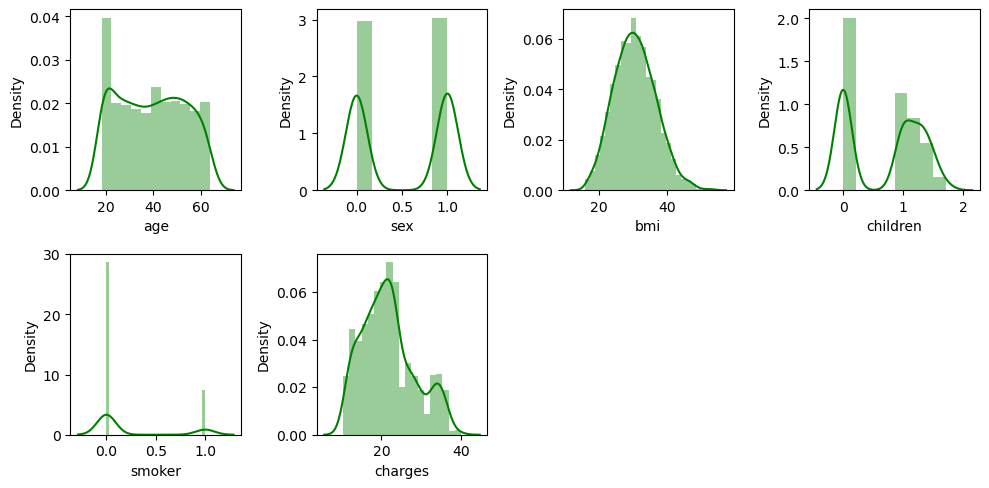

In [21]:
#lets check Again how the data has been distributed in remaining column 
plt.figure(figsize = (10, 7), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col], color='g')        
        plt.yticks(rotation=0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()

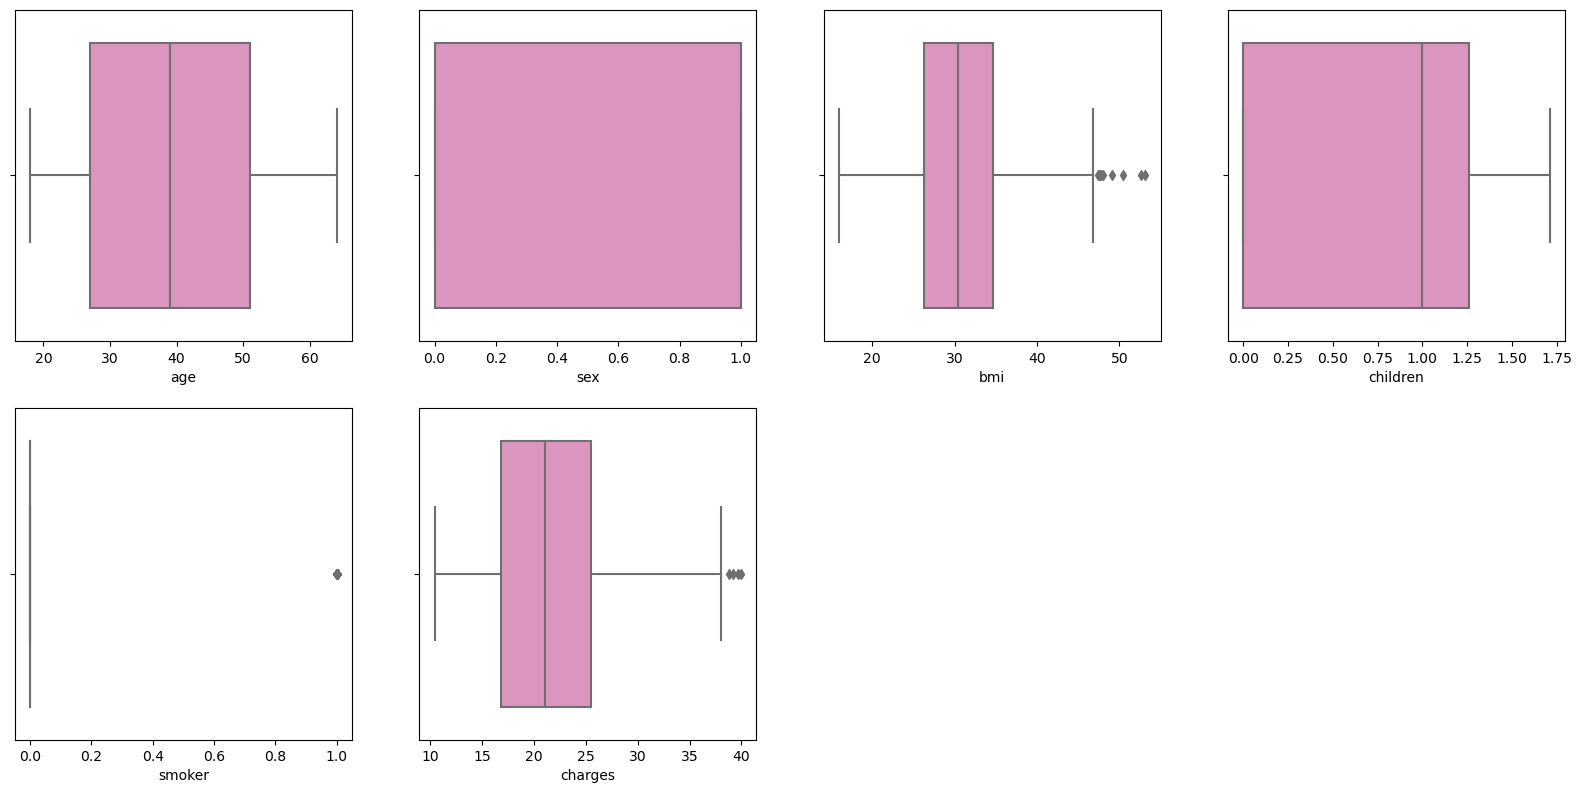

In [22]:
#lets check the outliners by plotting box plot
plt.figure(figsize = (20, 25))
p=1
for i in df:
    if p<=6:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')        
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [23]:
#Checking the correlation between feature and the target. NOTE: RAnge is from (-1 to +1) & 0 represent no correlation
cor=df.corr()
cor


,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.048919,-0.025019,0.451354
sex,-0.020856,1.000000,0.046371,0.016183,0.076185,0.027560
bmi,0.109272,0.046371,1.000000,0.016515,0.003750,0.156375
children,0.048919,0.016183,0.016515,1.000000,0.011829,0.128511
smoker,-0.025019,0.076185,0.003750,0.011829,1.000000,0.732564
charges,0.451354,0.027560,0.156375,0.128511,0.732564,1.000000


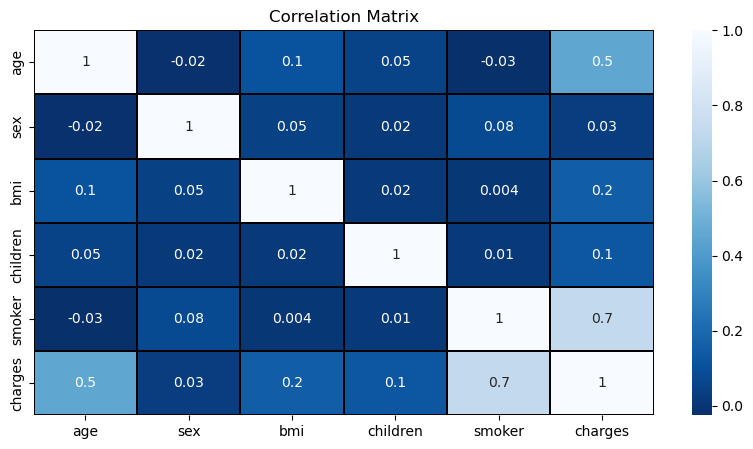

In [24]:
#Visualising the correlation matrix by plotting heat map
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', linecolor='black', fmt=".1g", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

# NOTE: 0- no relation, -0.3 to +0.3 - less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or greater than +0.7 high correlation

In [25]:
cor['charges'].sort_values(ascending= False)

charges     1.000000
smoker      0.732564
age         0.451354
bmi         0.156375
children    0.128511
sex         0.027560
Name: charges, dtype: float64

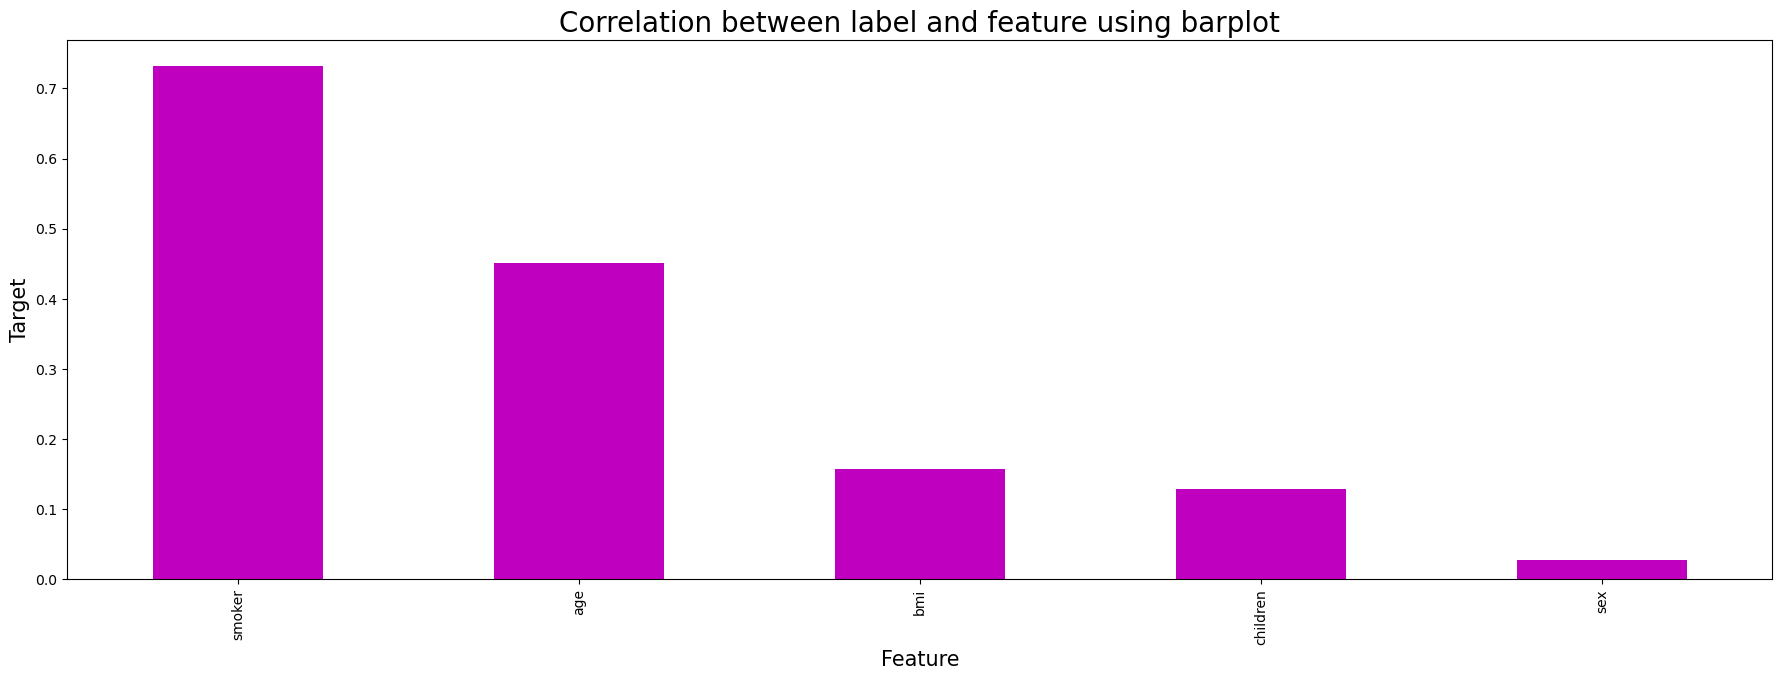

In [26]:
#Visualising the correlation between label and features using bar plot

plt.figure(figsize= (22, 7))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and feature using barplot', fontsize=20)
plt.show()


11.791690    2
25.654666    1
30.839610    1
13.048271    1
27.052506    1
            ..
19.438627    1
29.666427    1
30.469610    1
10.475061    1
30.773007    1
Name: charges, Length: 1337, dtype: int64


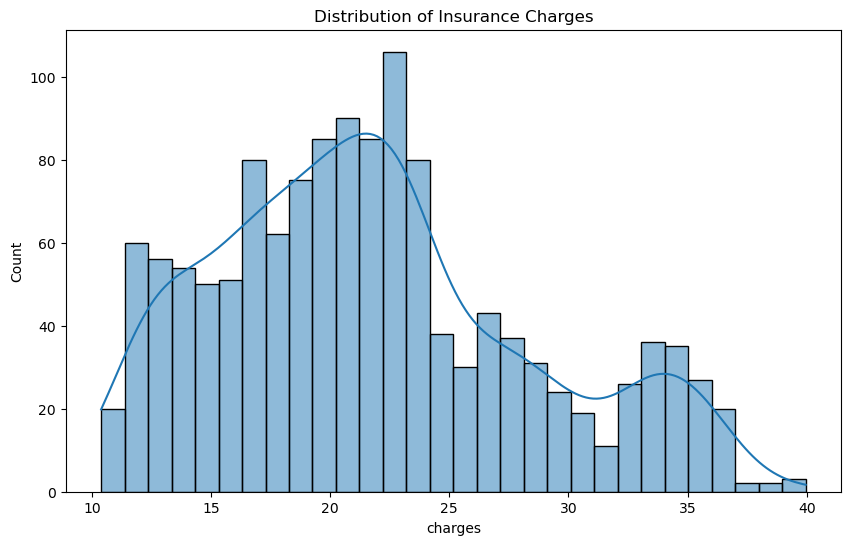

In [27]:
# Again Visualisation of distribution of the target variable (charges)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
print(df['charges'].value_counts())
plt.show()

In [ ]:
#MODELING

In [28]:
# Split the dataset into features (x) and target variable (y)
x = df.drop(['charges'], axis=1)
y = df['charges']

In [29]:
#important necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [30]:
# Finding the best random state

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize Linear Regression
    lr = LinearRegression()
    
    # Train the model
    lr.fit(x_train, y_train)
    
    # Make predictions
    pred = lr.predict(x_test)
    
    # Calculate acc
    acc = r2_score(y_test, pred)
    
    # Update the best random state if the current acc is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Maximum r2 score is", maxAccu, "on Random_state", maxRS)

    


Maximum r2 score is 0.8246296154990662 on Random_state 112


In [33]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRS)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge


In [35]:
# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(x_train, y_train)

# Make predictions on the test set
pred_LR = LR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = LR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.8246296154990662
R2_score on training data: 75.42022596345763
Mean Absolute Error: 1.987047686807429
Mean Squared Error: 8.166174629255911
Root Mean Squared Error: 2.8576519433366814


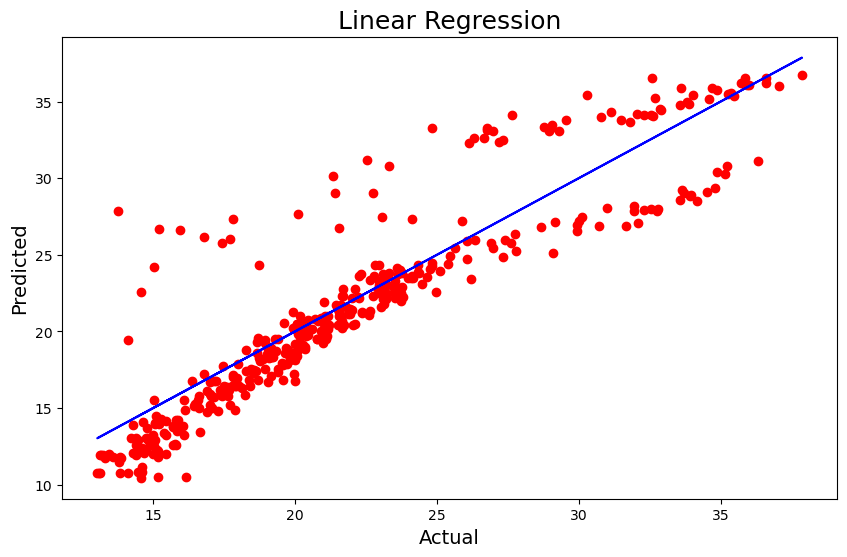

In [36]:
#scatter plot with the actual vs. predicted values for Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [37]:
RFR = RandomForestRegressor()

# Fit the model to the training data
RFR.fit(x_train, y_train)

# Make predictions on the test set
pred_RFR =RFR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = RFR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.8571835759001215
R2_score on training data: 96.62070603845189
Mean Absolute Error: 1.4279984808734578
Mean Squared Error: 6.650289685139342
Root Mean Squared Error: 2.5788155585732264


In [38]:
knn = KNN()

# Fit the model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test set
pred_knn =knn.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = knn.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.32133788515654793
R2_score on training data: 51.317352850481946
Mean Absolute Error: 4.09926374362144
Mean Squared Error: 31.602105223429273
Root Mean Squared Error: 5.6215749771242285


In [39]:
GBR = GradientBoostingRegressor()

# Fit the model to the training data
GBR.fit(x_train, y_train)

# Make predictions on the test set
pred_GBR =GBR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = GBR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.8790732755171499
R2_score on training data: 86.93062317262094
Mean Absolute Error: 1.4007455333623524
Mean Squared Error: 5.6309892475922165
Root Mean Squared Error: 2.372970553460834


In [40]:
lasso = Lasso()

# Fit the model to the training data
lasso.fit(x_train, y_train)

# Make predictions on the test set
pred_lasso =lasso.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = lasso.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.6544374214589355
R2_score on training data: 58.91878344248633
Mean Absolute Error: 3.156376001789197
Mean Squared Error: 16.09122526436195
Root Mean Squared Error: 4.011386950215841


In [41]:
rd = Ridge()

# Fit the model to the training data
rd.fit(x_train, y_train)

# Make predictions on the test set
pred_rd =rd.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = rd.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.8245000116788613
R2_score on training data: 75.41772865286572
Mean Absolute Error: 1.9934222438074307
Mean Squared Error: 8.172209670072089
Root Mean Squared Error: 2.8587076923099515


In [42]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test set
pred_dtr =dtr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = dtr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_dtr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score: 0.7294457282290244
R2_score on training data: 99.72645112683293
Mean Absolute Error: 1.692694323786354
Mean Squared Error: 12.598440929809247
Root Mean Squared Error: 3.549428253931786


In [43]:
from sklearn.svm import SVR

svr=SVR()
# Fit the model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test set
pred_svr =svr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = svr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score: 0.053322183072952556
R2_score on training data: -1.8508658620190799
Mean Absolute Error: 3.794258250743407
Mean Squared Error: 44.082336893250435
Root Mean Squared Error: 6.639453056784906


In [44]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
# Fit the model to the training data
etr.fit(x_train, y_train)

# Make predictions on the test set
pred_etr =etr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = etr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_etr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score: 0.8207582187890232
R2_score on training data: 99.72645112683293
Mean Absolute Error: 1.5318849872812277
Mean Squared Error: 8.346447379887698
Root Mean Squared Error: 2.8890218725180494


In [45]:
from sklearn.model_selection import cross_val_score

In [ ]:
""" default scoring parameterin cross validation for classification models is - accuracy
default scoring parameterin cross validation for regression model is - r squared score  """

In [46]:
#cross_val_score on the Linear regression model (to insure overfitting or not )

score= cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_LR)- score.mean())*100)

[0.80470235 0.70507075 0.83002831 0.76874003 0.76328667]
0.7743656213115159
Difference between R2 score and cross validation score is  5.026399418755034


In [47]:
#cross_val_score on the RandomForestRegressor
score1= cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_RFR)- score1.mean())*100)

[0.83242387 0.71335916 0.83262775 0.79411279 0.7839051 ]
0.7912857342450911
Difference between R2 score and cross validation score is  6.589784165503043


In [48]:
#cross_val_score on the KNN

score2= cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_knn)- score2.mean())*100)

[0.25999119 0.29304618 0.25257914 0.3314032  0.25340342]
0.27808462530079464
Difference between R2 score and cross validation score is  4.325325985575329


In [49]:
#cross_val_score on the GradientBoostingRegressor

score3= cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_GBR)- score3.mean())*100)

[0.86565721 0.74857603 0.89017861 0.8294536  0.82190327]
0.8311537429626533
Difference between R2 score and cross validation score is  4.791953255449655


In [50]:
#cross_val_score on the lasso
score4= cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_lasso)- score4.mean())*100)

[0.64333683 0.6171663  0.64316556 0.63505463 0.57611848]
0.6229683583935535
Difference between R2 score and cross validation score is  3.1469063065381997


In [51]:
#cross_val_score on the Ridge
score5= cross_val_score(rd,x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_rd)- score5.mean())*100)

[0.80461724 0.7056021  0.82950133 0.76906129 0.76298292]
0.7743529761082715
Difference between R2 score and cross validation score is  5.014703557058986


In [52]:
#cross_val_score on the DecisionTreeRegressor
score6= cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_dtr)- score6.mean())*100)

[0.67498843 0.60055077 0.60468367 0.70261507 0.5629972 ]
0.6291670289975636
Difference between R2 score and cross validation score is  10.027869923146081


In [53]:
#cross_val_score on the SVR
score7= cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_svr)- score7.mean())*100)

[-0.00463419  0.08648764  0.06689337  0.04807099 -0.16502408]
0.006358744304201358
Difference between R2 score and cross validation score is  4.69634387687512


In [54]:
#cross_val_score on the ExtraTreesRegressor
score8= cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_etr)- score8.mean())*100)

[0.77940918 0.66969485 0.80244649 0.75859504 0.74439747]
0.7509086090988311
Difference between R2 score and cross validation score is  6.984960969019216


In [ ]:
#From the difference of both R2 score and Cross Validation scoe computed on R2 score we can conclude that Gradient Boosting Regressor as our best fitting and best performing model

In [ ]:
"""GridSearchCV performs a search over the specified parameter values using cross-validation.
The best hyperparameters are printed, and the best model is obtained.
The model is evaluated on the test set using Mean Squared Error and R-squared."""

In [55]:
#GridSearchCV performs a search over the specified parameter values using cross-validation. (Gradient Boosting Regressor)

from sklearn.model_selection import GridSearchCV
# Initialize the model
GBR = GradientBoostingRegressor() #already defined above still writing to easy remember

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
gscv = GridSearchCV(estimator=GBR, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [56]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [57]:
# Get the best parameters and best model
best_params = gscv.best_params_
best_model = gscv.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 5.278374256463984
R-squared: 0.8866457594992351


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

Model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=1.0,random_state=1)

#n_estimators is the number of boosting stages to be run.
#learning_rate is the shrinkage applied to each tree's contribution.
#max_depth is the maximum depth of the individual trees.
#subsample is the fraction of samples used for fitting the trees.
#random_state is the seed used by the random number generator.

In [59]:
#Again building the model & checking the performance

Model.fit(x_train, y_train)

# Make predictions on the test set
pred =Model.predict(x_test)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8791978232502579
Mean Absolute Error: 1.3996532576924572
Mean Squared Error: 5.625189644990371
Root Mean Squared Error: 2.371748225463734


In [ ]:
# Now Saving the model , after checking the performance of the final model

In [60]:
import pickle
filename='Insurence_cost.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model

In [ ]:
#After saving the model if we want to use the same model in future , we can load the model by using the 'open'method

In [61]:
import pickle
loaded_model=pickle.load(open('Insurence_cost.pkl','rb')) # rb= read binary
result=loaded_model.score(x_test,y_test)
print(result*100)

87.91978232502579


In [62]:
#Now if we want to see what the difference between our predicted and original value

conclusion= pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
Predicted,22.892055,20.054203,30.985254,28.932538,29.365826,19.816828,20.131005,27.112374,18.535353,14.978486,...,19.553580,32.301986,23.756965,19.410017,22.232757,19.470983,18.149309,20.426716,13.327896,14.080552
Original,22.300771,20.014208,32.591173,29.058028,28.831918,20.049609,20.208065,27.477553,17.384021,11.980144,...,19.171778,33.113110,23.760959,18.568571,21.447903,18.143278,17.374865,19.082468,13.891939,12.535078
